<a href="https://colab.research.google.com/github/ah-lan/ah-lan/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scipy filterpy scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=941f9f3b5a724aae8c83d3a496c32b791644ebac57b8529c0082a76796bc7b06
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy


In [ ]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import filterpy.kalman as kalman  # If you use Kalman filter later
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("U001_train_intention.csv")  # Make sure the file is in the correct location


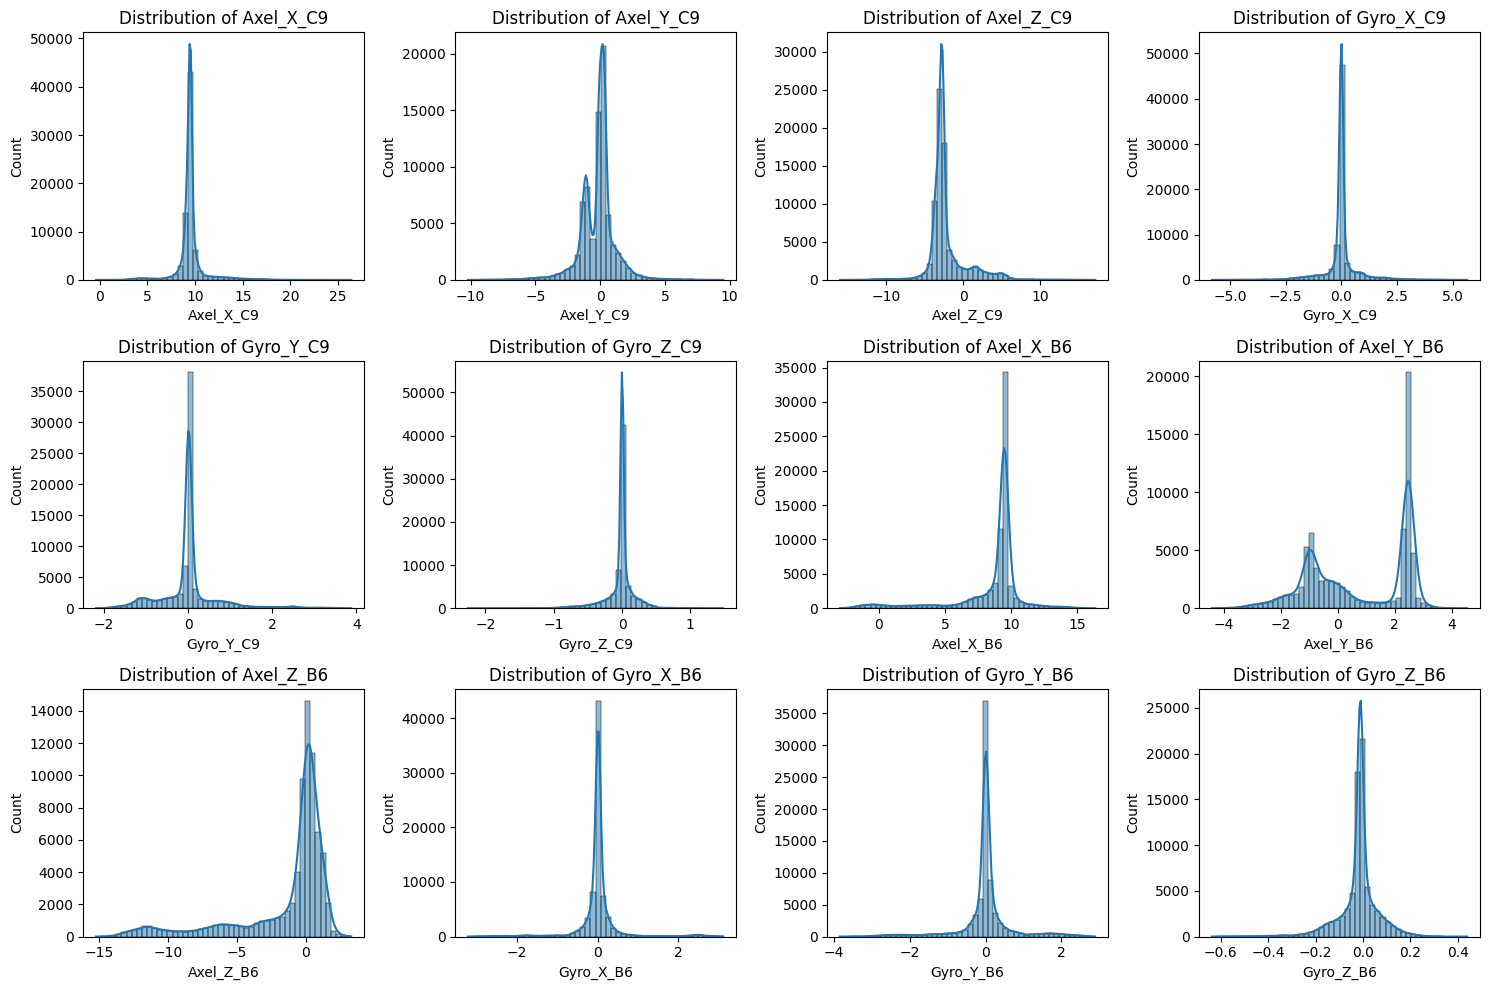

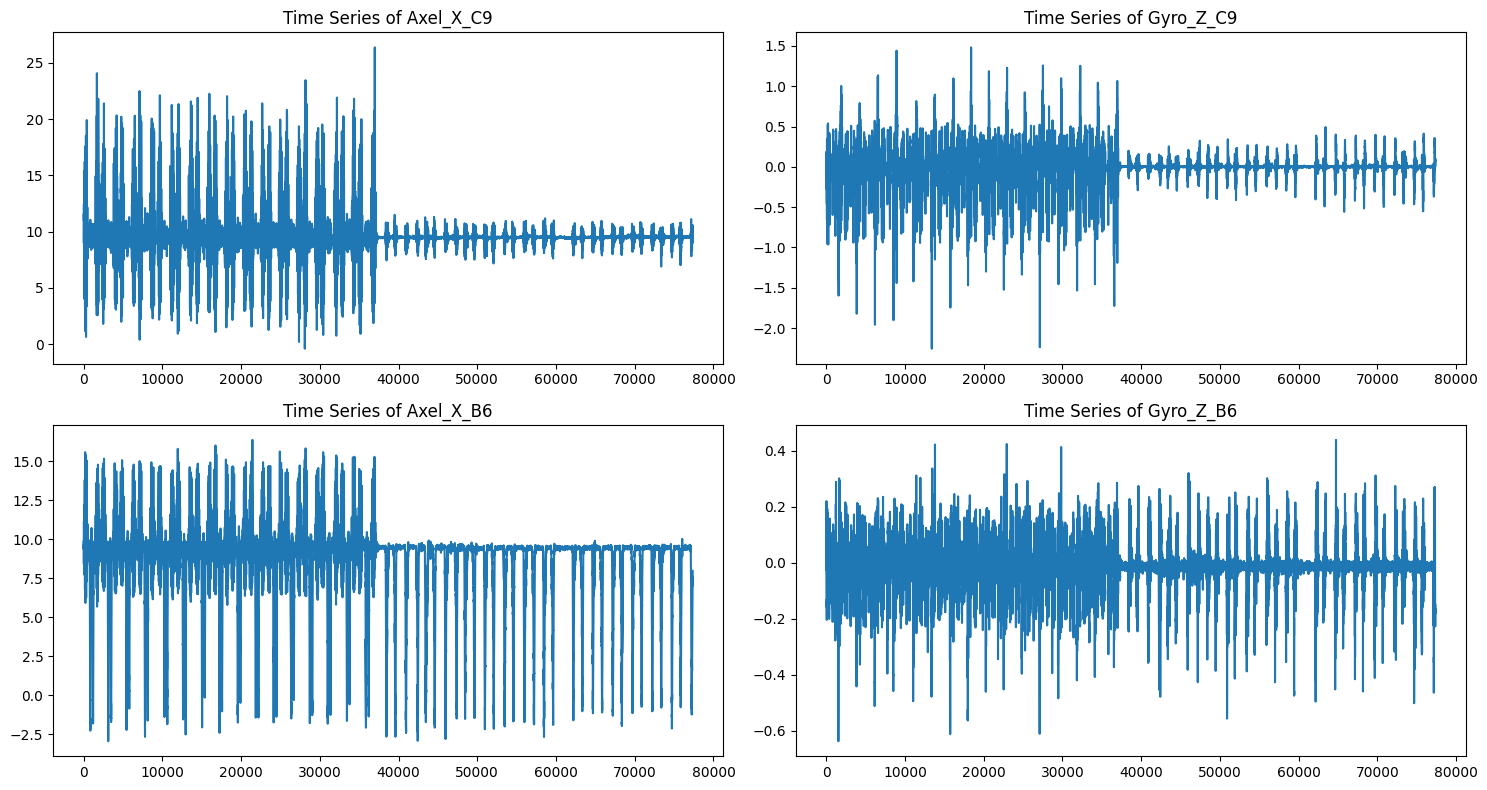

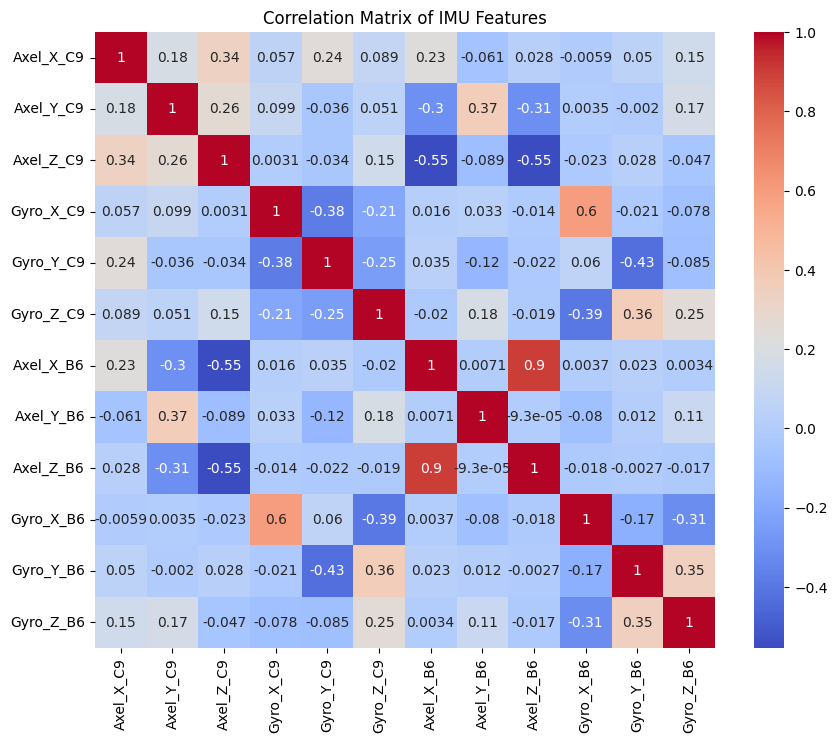

In [ ]:
# Example: Visualize distributions for a few key features from different sensors
imu_features = ['Axel_X_C9', 'Axel_Y_C9', 'Axel_Z_C9', 'Gyro_X_C9', 'Gyro_Y_C9', 'Gyro_Z_C9',
                'Axel_X_B6', 'Axel_Y_B6', 'Axel_Z_B6', 'Gyro_X_B6', 'Gyro_Y_B6', 'Gyro_Z_B6']  # Example - include relevant features

plt.figure(figsize=(15, 10))  # Adjust figure size as needed
for i, feature in enumerate(imu_features, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid as needed
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Example: Time series plot for a few features to see how they change over time
time_series_features = ['Axel_X_C9', 'Gyro_Z_C9', 'Axel_X_B6', 'Gyro_Z_B6'] # Example
plt.figure(figsize=(15, 8))
for i, feature in enumerate(time_series_features, 1):
    plt.subplot(2, 2, i)
    plt.plot(df[feature])  # Assuming your DataFrame has a default numerical index representing time
    plt.title(f"Time Series of {feature}")
plt.tight_layout()
plt.show()

# Example: Correlation matrix to see relationships between features
correlation_matrix = df[imu_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of IMU Features")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 100  # Hz
num_samples = len(df)
time = np.linspace(0, (num_samples - 1) / sampling_rate, num_samples)  # Correct way to create time array
df['time'] = time

# ... (Rest of your plotting code - same as before) ...

logistic regression model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


In [ ]:
df = pd.read_csv("U001_train_intention.csv")


In [ ]:
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88470 entries, 0 to 88469
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Axel_X_C9  88470 non-null  float64
 1   Axel_Y_C9  88470 non-null  float64
 2   Axel_Z_C9  88470 non-null  float64
 3   Gyro_X_C9  88470 non-null  float64
 4   Gyro_Y_C9  88470 non-null  float64
 5   Gyro_Z_C9  88470 non-null  float64
 6   Axel_X_3B  88470 non-null  float64
 7   Axel_Y_3B  88470 non-null  float64
 8   Axel_Z_3B  88470 non-null  float64
 9   Gyro_X_3B  88470 non-null  float64
 10  Gyro_Y_3B  88470 non-null  float64
 11  Gyro_Z_3B  88470 non-null  float64
 12  Axel_X_B5  88470 non-null  float64
 13  Axel_Y_B5  88470 non-null  float64
 14  Axel_Z_B5  88470 non-null  float64
 15  Gyro_X_B5  88470 non-null  float64
 16  Gyro_Y_B5  88470 non-null  float64
 17  Gyro_Z_B5  88470 non-null  float64
 18  Axel_X_B6  88470 non-null  float64
 19  Axel_Y_B6  88470 non-null  float

In [ ]:
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :] = imputer.fit_transform(df)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
print(X.isna().sum())


Axel_X_C9    0
Axel_Y_C9    1
Axel_Z_C9    1
Gyro_X_C9    1
Gyro_Y_C9    1
Gyro_Z_C9    1
Axel_X_3B    1
Axel_Y_3B    1
Axel_Z_3B    1
Gyro_X_3B    1
Gyro_Y_3B    1
Gyro_Z_3B    1
Axel_X_B5    1
Axel_Y_B5    1
Axel_Z_B5    1
Gyro_X_B5    1
Gyro_Y_B5    1
Gyro_Z_B5    1
Axel_X_B6    1
Axel_Y_B6    1
Axel_Z_B6    1
Gyro_X_B6    1
Gyro_Y_B6    1
Gyro_Z_B6    1
Axel_X_BB    1
Axel_Y_BB    1
Axel_Z_BB    1
Gyro_X_BB    1
Gyro_Y_BB    1
Gyro_Z_BB    1
dtype: int64


In [ ]:
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)
y = y.fillna(y.mean())

In [ ]:
# Check for missing values across the entire dataset
print(df.isna().sum())



Axel_X_C9    0
Axel_Y_C9    0
Axel_Z_C9    0
Gyro_X_C9    0
Gyro_Y_C9    0
Gyro_Z_C9    0
Axel_X_3B    0
Axel_Y_3B    0
Axel_Z_3B    0
Gyro_X_3B    0
Gyro_Y_3B    0
Gyro_Z_3B    0
Axel_X_B5    0
Axel_Y_B5    0
Axel_Z_B5    0
Gyro_X_B5    0
Gyro_Y_B5    0
Gyro_Z_B5    0
Axel_X_B6    0
Axel_Y_B6    0
Axel_Z_B6    0
Gyro_X_B6    0
Gyro_Y_B6    0
Gyro_Z_B6    0
Axel_X_BB    0
Axel_Y_BB    0
Axel_Z_BB    0
Gyro_X_BB    0
Gyro_Y_BB    0
Gyro_Z_BB    0
target       0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np  # Import numpy

y_test_clean = y_test.copy()
y_pred_clean = y_pred.copy()

# Initialize masks (important!)
mask_y_test = np.ones(len(y_test), dtype=bool)  # All True initially
mask_y_pred = np.ones(len(y_pred), dtype=bool)  # All True initially

if y_test.isna().any():
    print("Warning: y_test contains NaN values. Removing rows with NaNs.")
    mask_y_test = ~y_test.isna()  # Create mask for valid (non-NaN) indices
    y_test_clean = y_test[mask_y_test]
    y_pred_clean = y_pred[mask_y_test]

if pd.isna(y_pred).any():
    print("Warning: y_pred contains NaN values. Removing rows with NaNs.")
    mask_y_pred = ~pd.isna(y_pred)  # Create mask for valid indices in y_pred
    y_pred_clean = y_pred[mask_y_pred]
    y_test_clean = y_test_clean[mask_y_pred]  # Apply the mask to y_test_clean as well

accuracy = accuracy_score(y_test_clean, y_pred_clean)
print(f"Model Accuracy: {accuracy:.4f}")

report = classification_report(y_test_clean, y_pred_clean, output_dict=True)
print("Classification Report:")
print(classification_report(y_test_clean, y_pred_clean))

f1_score = report['weighted avg']['f1-score']
print(f"F1-Score (Weighted): {f1_score:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test_clean, y_pred_clean))

NameError: name 'y_test' is not defined

NameError: name 'df' is not defined

genetic algorithms

In [3]:
!pip install deap



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.1 MB/s eta 0:00:00


In [6]:
df = pd.read_csv("U001_train_intention.csv")

In [7]:
print(df.isnull().sum())  # Should return all zeros if NaNs are removed


Axel_X_C9    0
Axel_Y_C9    0
Axel_Z_C9    0
Gyro_X_C9    0
Gyro_Y_C9    0
Gyro_Z_C9    0
Axel_X_3B    0
Axel_Y_3B    0
Axel_Z_3B    0
Gyro_X_3B    0
Gyro_Y_3B    0
Gyro_Z_3B    0
Axel_X_B5    0
Axel_Y_B5    0
Axel_Z_B5    0
Gyro_X_B5    0
Gyro_Y_B5    0
Gyro_Z_B5    0
Axel_X_B6    0
Axel_Y_B6    0
Axel_Z_B6    0
Gyro_X_B6    0
Gyro_Y_B6    0
Gyro_Z_B6    0
Axel_X_BB    1
Axel_Y_BB    1
Axel_Z_BB    1
Gyro_X_BB    1
Gyro_Y_BB    1
Gyro_Z_BB    1
target       1
dtype: int64


In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
print(df.isnull().sum())


Axel_X_C9    0
Axel_Y_C9    0
Axel_Z_C9    0
Gyro_X_C9    0
Gyro_Y_C9    0
Gyro_Z_C9    0
Axel_X_3B    0
Axel_Y_3B    0
Axel_Z_3B    0
Gyro_X_3B    0
Gyro_Y_3B    0
Gyro_Z_3B    0
Axel_X_B5    0
Axel_Y_B5    0
Axel_Z_B5    0
Gyro_X_B5    0
Gyro_Y_B5    0
Gyro_Z_B5    0
Axel_X_B6    0
Axel_Y_B6    0
Axel_Z_B6    0
Gyro_X_B6    0
Gyro_Y_B6    0
Gyro_Z_B6    0
Axel_X_BB    0
Axel_Y_BB    0
Axel_Z_BB    0
Gyro_X_BB    0
Gyro_Y_BB    0
Gyro_Z_BB    0
target       0
dtype: int64


In [13]:
value_counts = df["target"].value_counts()
df = df[df["target"].isin(value_counts[value_counts > 1].index)]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df.drop(columns=["target"]).values
y = df["target"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


define GAS

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Define GA parameters
POP_SIZE = 20  # Population size
N_GEN = 10     # Number of generations
MUTATION_PROB = 0.2
CROSSOVER_PROB = 0.5

# Define fitness function for GA (using a simple MLP classifier)
def evaluate(individual):
    selected_features = np.where(np.array(individual) == 1)[0]
    if len(selected_features) == 0:
        return (0,)  # Avoid empty feature selection

    X_train_subset = X_train[:, selected_features]
    X_test_subset = X_test[:, selected_features]

    # Train an MLP classifier
    model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)

    return (accuracy_score(y_test, y_pred),)  # Return accuracy as fitness

# Define individual and population for GA
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize accuracy
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)  # Binary selection (0 or 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic operations
toolbox.register("mate", tools.cxTwoPoint)  # Crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Bit mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection
toolbox.register("evaluate", evaluate)


In [1]:
from deap import base, creator, tools
import numpy as np

# Define the problem as a maximization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the problem-specific toolbox
toolbox = base.Toolbox()

# Function to generate a random individual (feature subset)
def random_feature():
    return np.random.randint(2, size=number_of_features)  # Binary vector of size number_of_features

toolbox.register("individual", tools.initIterate, creator.Individual, random_feature)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function (e.g., based on a classifier)
def evaluate(individual):
    selected_features = np.where(np.array(individual) == 1)[0]
    if len(selected_features) == 0:
        return 0,  # Penalize if no features are selected
    # Use a model (e.g., SVM, Random Forest) to evaluate the subset performance
    # For example:
    model = SomeClassifier()  # Replace with your actual model
    model.fit(X_train[:, selected_features], y_train)  # Assuming X_train is the feature matrix
    accuracy = model.score(X_test[:, selected_features], y_test)  # Assuming X_test, y_test are available
    return accuracy,  # Return as a tuple

toolbox.register("mate", tools.cxTwoPoint)  # Two-point crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Bit flip mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Tournament selection
toolbox.register("evaluate", evaluate)  # Your custom evaluation function



In [ ]:
import pandas as pd
from deap import base, creator, tools, algorithms
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen model

# Load the dataset
df = pd.read_csv('U001_train_intention.csv')

# Check the structure and define the target column
print(df.head())

# Define the features and target columns (adjust the target column name as needed)
X = df.drop(columns=['target'])  # Replace with the actual name of the target column
y = df['target']  # Replace with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the number of features
number_of_features = X_train.shape[1]  # This gets the number of features in your dataset

# Define the problem as a maximization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the problem-specific toolbox
toolbox = base.Toolbox()

# Function to generate a random individual (feature subset)
def random_feature():
    return np.random.randint(2, size=number_of_features)  # Binary vector of size number_of_features

toolbox.register("individual", tools.initIterate, creator.Individual, random_feature)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function (e.g., based on a classifier)
def evaluate(individual):
    selected_features = np.where(np.array(individual) == 1)[0]
    if len(selected_features) == 0:
        return 0,  # Penalize if no features are selected

    # Use a classifier (e.g., Random Forest) to evaluate the subset performance
    model = RandomForestClassifier()  # Replace with your actual model
    model.fit(X_train.iloc[:, selected_features], y_train)  # Fit the model using the selected features
    accuracy = model.score(X_test.iloc[:, selected_features], y_test)  # Calculate accuracy on the test set
    return accuracy,  # Return as a tuple

toolbox.register("mate", tools.cxTwoPoint)  # Two-point crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Bit flip mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Tournament selection
toolbox.register("evaluate", evaluate)  # Register the evaluation function

# Set GA parameters
POP_SIZE = 50  # Population size
CROSSOVER_PROB = 0.7  # Crossover probability
MUTATION_PROB = 0.2  # Mutation probability
N_GEN = 40  # Number of generations

# Initialize population
population = toolbox.population(n=POP_SIZE)

# Run the GA
algorithms.eaSimple(population, toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB, ngen=N_GEN, verbose=True)

# Extract the best feature subset
best_solution = tools.selBest(population, k=1)[0]
selected_features = np.where(np.array(best_solution) == 1)[0]

print("Selected Feature Indices:", selected_features)



   Axel_X_C9  Axel_Y_C9  Axel_Z_C9  Gyro_X_C9  Gyro_Y_C9  Gyro_Z_C9  \
0   9.074494  -0.481113  -3.455022   0.012343   0.011154   0.046459   
1   9.234787  -0.546570  -3.346555   0.055380  -0.006489   0.026373   
2   9.308741  -0.685120  -3.125236   0.122433  -0.021939   0.019428   
3   9.189075  -0.693756  -2.841300   0.202340  -0.025395   0.003973   
4   9.190679  -0.460600  -2.688468   0.268421  -0.013397   0.001976   

   Axel_X_3B  Axel_Y_3B  Axel_Z_3B  Gyro_X_3B  ...  Gyro_X_B6  Gyro_Y_B6  \
0   9.294066   0.016188  -1.866136   0.280846  ...  -0.073917  -0.320395   
1   9.358950  -0.003909  -1.534498   0.243645  ...  -0.065672  -0.322257   
2   9.433356  -0.176038  -1.508867   0.232980  ...  -0.053523  -0.315645   
3   9.444161  -0.416103  -1.774503   0.247104  ...  -0.060104  -0.311796   
4   9.452289  -0.433332  -1.949570   0.219017  ...  -0.077943  -0.306367   

   Gyro_Z_B6  Axel_X_BB  Axel_Y_BB  Axel_Z_BB  Gyro_X_BB  Gyro_Y_BB  \
0  -0.011203   9.100456  -2.485844   2.495687

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

final_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
final_model.fit(X_train_selected, y_train)

y_pred = final_model.predict(X_test_selected)

from sklearn.metrics import accuracy_score
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))